In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
from datetime import timedelta
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd

In [5]:
import pytz
from pandas.tseries.frequencies import to_offset
from scipy.stats import percentileofscore

In [13]:
stock_data = pd.read_csv("stock_files/all_stocks_5yr.csv.zip", parse_dates=True, index_col=0)
#stocks = stock_data[["AAPL", "MSFT", "XOM", "SPX"]]
#stks = stks.resample("B").ffill
#stock_data
type(stock_data)

pandas.core.frame.DataFrame

In [49]:
microsoft_data = stock_data[stock_data['Name'] == 'MSFT']
microsoft_data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [51]:
google_data = stock_data[stock_data['Name'] == 'GOOG']
google_data.head()

,open,high,low,close,volume,Name
date,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [53]:
amazon_data = stock_data[stock_data['Name'] == 'AMZN']
amazon_data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [61]:
facebook_data = stock_data[stock_data['Name'] == 'FB']
facebook_data

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,28.89,29.1700,28.51,28.5450,37662614,FB
2013-02-11,28.61,28.6800,28.04,28.2600,36979533,FB
2013-02-12,27.67,28.1600,27.10,27.3700,93417215,FB
2013-02-13,27.36,28.3200,27.31,27.9075,50100805,FB
2013-02-14,28.02,28.6300,28.01,28.5000,35581045,FB
...,...,...,...,...,...,...
2018-02-01,188.22,195.3200,187.89,193.0900,54211293,FB
2018-02-02,192.04,194.2100,189.98,190.2800,26677484,FB
2018-02-05,186.93,190.6100,180.61,181.2600,33128206,FB


In [67]:
netflix_data = stock_data[stock_data['Name'] == 'NFLX']
netflix_data

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,25.9635,26.2800,25.7157,25.8528,25649820,NFLX
2013-02-11,25.5685,26.0071,24.9714,25.4128,29321782,NFLX
2013-02-12,25.8085,26.2228,25.1014,25.4214,34388802,NFLX
2013-02-13,25.8428,26.6285,25.6657,26.6098,40799094,NFLX
2013-02-14,26.7557,27.1214,26.3844,26.7714,31968685,NFLX
...,...,...,...,...,...,...
2018-02-01,266.4100,271.9500,263.3800,265.0700,9669011,NFLX
2018-02-02,263.0000,270.6200,262.7100,267.4300,9123610,NFLX
2018-02-05,262.0000,267.8990,250.0300,254.2600,11896053,NFLX


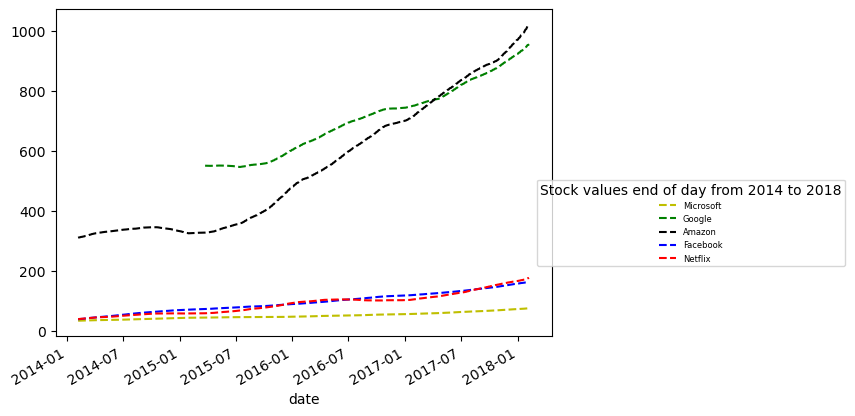

In [199]:
microsoft_data['close'].rolling(250).mean().plot(style="y--", label = 'Microsoft')
google_data['close'].rolling(250).mean().plot(style="g--", label = 'Google')
amazon_data['close'].rolling(250).mean().plot(style="k--", label = 'Amazon')
facebook_data['close'].rolling(250).mean().plot(style="b--", label = 'Facebook')
netflix_data['close'].rolling(250).mean().plot(style="r--", label = 'Netflix')
plt.legend(title = 'Stock values end of day from 2014 to 2018', 
           prop={'size': 6}, bbox_to_anchor=(1.6, 0.2), loc='lower right')

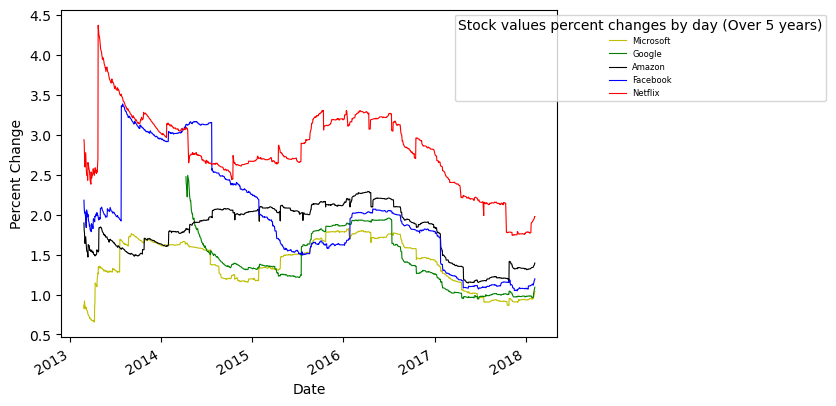

In [179]:
microsoft_year_change = microsoft_data['close'].pct_change().rolling(250, min_periods=10).std()*100
google_year_change = google_data['close'].pct_change().rolling(250, min_periods=10).std()*100
amazon_year_change = amazon_data['close'].pct_change().rolling(250, min_periods=10).std()*100
facebook_year_change = facebook_data['close'].pct_change().rolling(250, min_periods=10).std()*100
netflix_year_change = netflix_data['close'].pct_change().rolling(250, min_periods=10).std()*100

w = .8
microsoft_year_change.plot(style="y", label = 'Microsoft', linewidth = w)
google_year_change.plot(style="g", label = 'Google', linewidth = w)
amazon_year_change.plot(style="k", label = 'Amazon', linewidth = w)
facebook_year_change.plot(style="b", label = 'Facebook', linewidth = w)
netflix_year_change.plot(style="r", label = 'Netflix', linewidth = w)

plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.legend(title = 'Stock values percent changes by day (Over 5 years)', 
           prop={'size': 6}, bbox_to_anchor=(1.55, 1), loc='upper right')

In [181]:
google_year_change

date
2014-03-27         NaN
2014-03-28         NaN
2014-03-31         NaN
2014-04-01         NaN
2014-04-02         NaN
                ...   
2018-02-01    0.964861
2018-02-02    1.014020
2018-02-05    1.065010
2018-02-06    1.074351
2018-02-07    1.091923
Name: close, Length: 975, dtype: float64

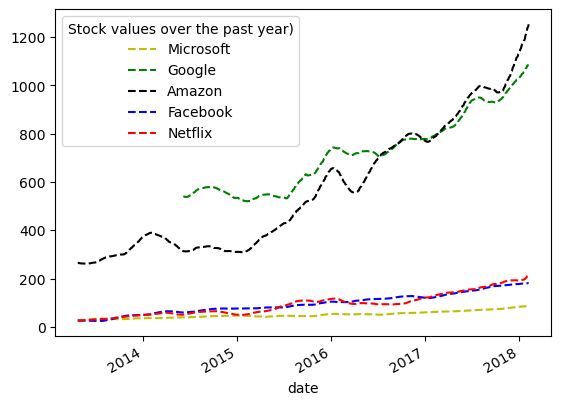

In [161]:
microsoft_data['close'].rolling(50).mean().plot(style="y--", label = 'Microsoft')
google_data['close'].rolling(50).mean().plot(style="g--", label = 'Google')
amazon_data['close'].rolling(50).mean().plot(style="k--", label = 'Amazon')
facebook_data['close'].rolling(50).mean().plot(style="b--", label = 'Facebook')
netflix_data['close'].rolling(50).mean().plot(style="r--", label = 'Netflix')
plt.legend(title = 'Stock values over the past year)')

TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]